Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
import random as rd

def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

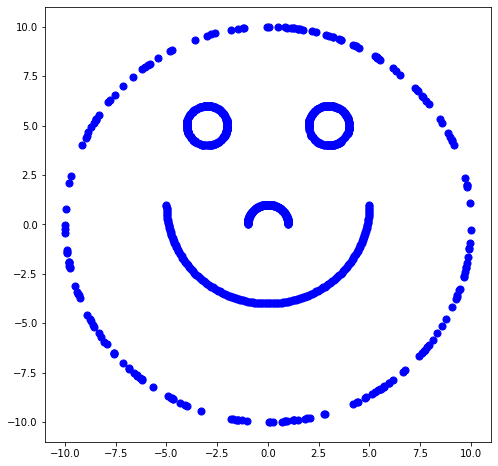

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


## 1a)

Below functions are:</br>
1. random_initialisation:takes input data and number of clusters and initialize N random means out of given Data and return the Means or Centroids set.</br>
2.euclidean_distance: takes two arrays and return euclidean distance of corresponding pairs.</br>
3.kmeans:takes input data points and K cluster number,distance meaning distance metric to use and init defines the initialisation.

In [4]:
def random_initialisation(X,k):
    Centroids=np.array([]).reshape(X.shape[1],0) 
    for i in range(k):
        rand=rd.randint(0,X.shape[0]-1)
        Centroids=np.c_[Centroids,X[rand]]
    return Centroids

def euclidean_distance(X,Y):
    tempDist=np.sum((X-Y)**2,axis=1)
    return tempDist      

def kmeans(X,K,distance,init):
    Output = np.zeros(len(X))
    means = init(X,K)
    count = 0
    row = X.shape[0]
    col = X.shape[1]
    while(True):
        count += 1
        Distances = np.array([]).reshape(row,0)
        for k in range(K):
                tempDist = distance(X.copy(),means[:,k])
                Distances = np.c_[Distances,tempDist]
        C=np.argmin(Distances,axis=1)
        
        Y={}
        for k in range(K):
            Y[k]=np.array([]).reshape(col,0)
        for i in range(row):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]

        for k in range(K):
            Y[k]=Y[k].T
        
        
        temp = np.array([]).reshape(col,0)
        for k in range(K):
            temp = np.c_[temp,np.mean(Y[k],axis=0)]
        
        if (Output == C).all():
            return Output,means
        
        means = temp
        Output = C

Below we have used the above mentioned functions to plot and visualize clusters on given smiley data we can oberserve that how nearby points were assigned same cluster labels.

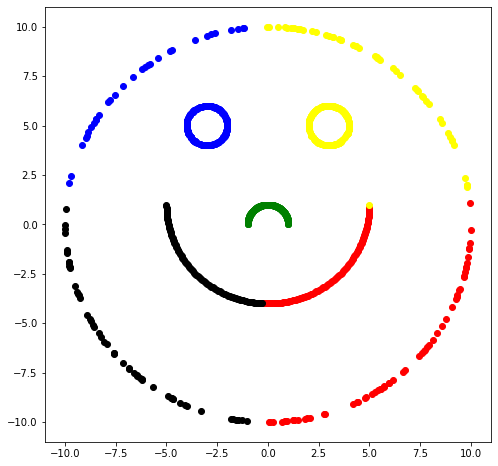

In [5]:
labels,_ = kmeans(X,5,euclidean_distance,random_initialisation)
plt.figure(figsize = (8,8))
plt.scatter(X[labels == 0,0],X[labels == 0,1],color = 'red')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color = 'yellow')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color = 'blue')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color = 'green')
plt.scatter(X[labels == 4,0],X[labels == 4,1],color = 'black')

## 1b)

For k-means++ we'll try to find point that are farthest to each other for a better initialisation that I have implemented the below with function plus_init it takes data and cluster-size and return centroids set far away point were selected as per distance more the distance from previous selected means better the possibility.

In [6]:
def plus_init(X,clusters):
    Centroids=np.array([]).reshape(X.shape[1],0) 
    index = np.random.choice(X.shape[0])
    Centroids = np.c_[Centroids,X[index]]
    X = np.delete(X,index,axis = 0)
    
    
    
    for i in range(clusters-1):
        tempdist = np.array([]).reshape(X.shape[0],0)
        for k in range(Centroids.shape[1]):
            tempdist = np.c_[tempdist,euclidean_distance(X,Centroids[:,k])]
        prob = np.min(tempdist,axis = 1)
        tot = np.sum(prob)

        new_centroid_index = np.random.choice(a = X.shape[0],p = prob/tot)
        new_centroid = X[new_centroid_index]
        X = np.delete(X,new_centroid_index,axis = 0)
        Centroids = np.c_[Centroids,new_centroid]
        
    
    return Centroids

Below I have plotted the output of cluster using kmeans++.

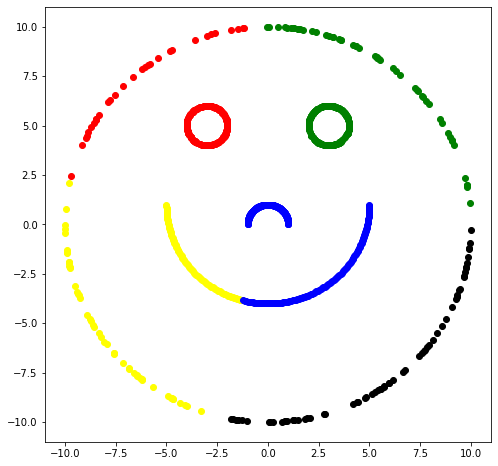

In [7]:
labels,_ = kmeans(X,5,euclidean_distance,plus_init)
plt.figure(figsize = (8,8))
plt.scatter(X[labels == 0,0],X[labels == 0,1],color = 'red')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color = 'yellow')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color = 'blue')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color = 'green')
plt.scatter(X[labels == 4,0],X[labels == 4,1],color = 'black')

## 1c)

#### For finding the best K value we'll use the Elbow curve method which is implemented using the WCSS(Within-Cluster-Sum of Squared).When the steepness of the curve decreases its the right point to stop.

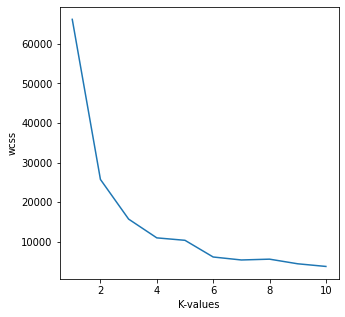

In [8]:
wcss = []
for k in range(1,11):
    labels,centroids = kmeans(X,k,euclidean_distance,random_initialisation)
    temp_wcss = 0
    for i in range(centroids.shape[1]):
        temp_wcss += np.sum(euclidean_distance(X[labels == i],centroids[:,i]))
    wcss.append(temp_wcss)
plt.figure(figsize = (5,5))
plt.plot(np.arange(1,11),wcss)
plt.xlabel("K-values")
plt.ylabel("wcss")
plt.show()

## For best k = 5

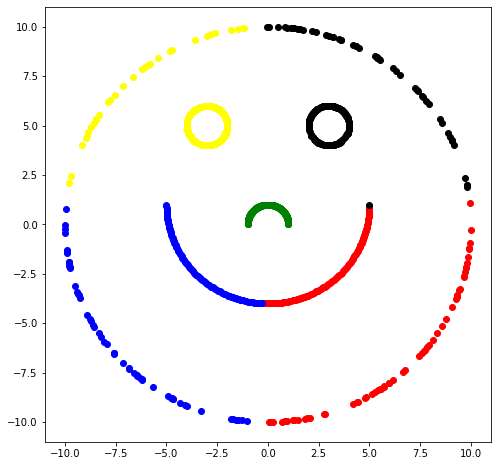

In [9]:
labels,_ = kmeans(X,5,euclidean_distance,plus_init)
plt.figure(figsize = (8,8))
plt.scatter(X[labels == 0,0],X[labels == 0,1],color = 'red')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color = 'yellow')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color = 'blue')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color = 'green')
plt.scatter(X[labels == 4,0],X[labels == 4,1],color = 'black')

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

## 1d)

#### For RBF kernel kmeans we'll change the X or data set from 2 dimension to an very high dimension feature space and then send it to the kmeans algoirthm to calculate the clusters using that feature space and then it will no more be a linear kernel.

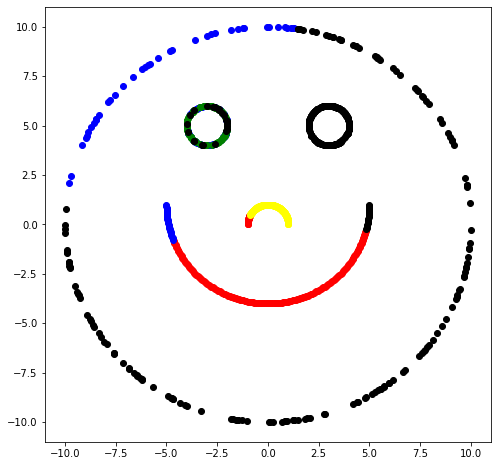

In [10]:
def e_distance(data1,data2):
    sum = 0
    dim = len(data1)
    for i in range(dim):
        sum+= (data1[i]-data2[i])**2
    return sum

def kernel(data,sigma):
    N = len(data)
    M = [[0]*N for i in range(N)]
    
    for i in range(N):
        for j in range(i,N):
            if i != j:
                square_dist = e_distance(data[i],data[j])
                base = 2.0*sigma**2
                M[i][j] = np.exp(-square_dist/base)
                M[i][j] = M[i][j]
    return M
X2 = kernel(X,X.std()*0.9)
X2 = np.array(X2)
labels,_ = kmeans(X2,5,euclidean_distance,random_initialisation)
plt.figure(figsize = (8,8))
plt.scatter(X[labels == 0,0],X[labels == 0,1],color = 'red')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color = 'yellow')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color = 'blue')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color = 'green')
plt.scatter(X[labels == 4,0],X[labels == 4,1],color = 'black')

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

## 2a) 
## Solution:
$\textbf{Derivation of E-step and M-step for EM Algorithm on GMM where mixture weights are known and covariances are restricted to be spherical}$</br>
$\Theta = \{\mu_k, \sigma_k^2\}_{k=1}^K$ and $\textit{x}_n \in R^D$ 

Let us evaluate some notations:

1) A Gaussian Mixture Distribution:

$$p(\textit{z}_n = k|\textit{x}_n, \hat{\Theta})\;\;\alpha\;\;p(\textit{z}_n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta})$$

$$= \pi_k * N(\textit{x}_n|\hat{\mu_k}, \hat{\sigma_k^2}I_D)$$


Also,

2)

$$\hat{\Theta} = argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} [log(p(X,Z|\Theta))]$$

$$= argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} \Bigg[\sum_{n=1}^N log(p(\textit{x}_n,\textit{z}_n|\Theta))\Bigg]$$

we have,  $p(\textit{x}n,\textit{z}_n|\Theta) = \sum{k=1}^K(p(\textit{z}n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta}))^{\textit{z}{nk}}$

where $\textit{z}{nk} = 1$ when $\textit{x}_n$ belongs to $k^{th}$ cluster, else $\textit{z}{nk} = 0$

So,

$$\hat{\Theta} = argmaxr_{\Theta} E\Bigg[\sum_{n=1}^N  \sum_{k=1}^K  \textit{z}_{nk} [log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]\Bigg]$$

using the expectation of $\textit{z}_{nk}$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$


Expectation Step 

$$E[\textit{z}{nk}] = \gamma{nk}$$

$$= 0 * p(\textit{z}{nk} = 0 | \textit{x}_n, \hat{\Theta}) + 1 * p(\textit{z}{nk} = 1 | \textit{x}_n, \hat{\Theta})$$

$$= \frac{\pi_k * N(\textit{x}n|\hat{\mu}_k, \hat{\sigma}_k^2 I_D)}{\sum{i=1}^K \pi_i * N(\textit{x}_n|\hat{\mu}_i, \hat{\sigma}_i^2 I_D)}$$

$$N_k = \sum_{n=1}^N \gamma_{nk}$$

Maximization Step

$$\hat{\Theta} = argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$= argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{\sqrt{(2\pi)^D|\sigma_k^2I_D|}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{(2\pi)^{\frac{D}{2}}(\sigma_k^2)^\frac{D}{2}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;\Bigg[log\,\pi_k + -\frac{D}{2}log(2\pi) - \frac{D}{2}log(\sigma_k^2) - \Big(\frac{1}{2\sigma_k^2}(\textit{x}_n - \mu_k)^TI_D(\textit{x}_n - \mu_k)\Big)\Bigg]$$



$\\$To find the MLE estimates of $\mu_k$ and $\sigma_k^2$ we will take the partial derivative of the above expression with respect to $\mu_k$ and $\sigma_k^2$.

Finding $\mu_{k}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \mu_{k}}=0
$$

$$
\begin{align*}
&\text{All the terms not belonging to the cluster of the paramter under consideration will go to 0}\\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\frac{\partial}{\partial \mu_{k}}\left(\frac{1}{2\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right]=0 \\
&\Longrightarrow \sum_{n=1}^{N}-\gamma_{n k}\left(x_{n}-\mu_{k}\right)=0 \\
&\Longrightarrow \sum_{n=1}^{N}-\gamma_{n k} x_{n}+\sum_{n=1}^{N} \gamma_{n k} \mu_{k}=0 \\
&\Longrightarrow \mu_{k} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k} x_{n} \\
&\Longrightarrow \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{\sum_{n=1}^{N} \gamma_{n k}} \\
&\Longrightarrow \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{N_{k}}
\end{align*}
$$

Finding $\sigma_{k}^{2}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \sigma_{k}^{2}}=0
$$

$$
\begin{align*}
&\text{All the terms not belonging to the cluster whose parameter is under consideration will go to 0}\\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k} \frac{\partial}{\partial \sigma_{k}^{2}}\left[-\frac{D}{2} \log\left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\frac{D}{2 \sigma_{k}^{2}}-\left(-\frac{1}{2\left(\sigma_{k}^{2}\right)^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[D \sigma_{k}^{2}-\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right]=0 \\
&\Longrightarrow \sum_{n=1}^{N} \gamma_{n k} D \sigma_{k}^{2}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
&\Longrightarrow D \sigma_{k}^{2} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
&\Longrightarrow \sigma_{k}^{2}=\frac{\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right)}{N_{k} D}
\end{align*}
$$


The EM Algorithm will be :<br>
1. Initialization
$$
\text{Set $\Theta$ =$\left\{\mu_{k}, \sigma_{k}^{2}\right\}_{k=1}^{K}$ as $\Theta^{0}$ and $t=0$}
$$<br><br>

2. E-Step
$$
\begin{align*}
E\left[z_{n k}\right]=\gamma_{n k} &= \frac{\pi_{k} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)} \\
N_{k} &= \sum_{n=1}^{N} \gamma_{n k}
\end{align*}
$$<br><br>

3. M-Step
$$
\begin{align*}
\mu_{k}^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t} x_{n}}{N_{k}^{t}} \\
\left(\sigma_{k}^{2}\right)^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t}\left(x_{n}-\mu_{k}^{t}\right)^{T}\left(x_{n}-\mu_{k}^{t}\right)}{N_{k}^{t} D}
\end{align*}
$$

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [11]:
import copy
from scipy.stats import multivariate_normal

### To generate Synthetic data:

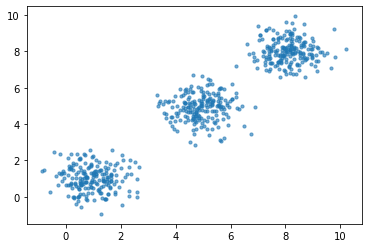

In [12]:
#creating the syntheic dataset
from sklearn.datasets import make_blobs
x ,z,y =make_blobs(n_samples=600, centers=[[1,1],[5,5],[8,8]], cluster_std=0.7 ,n_features=2,random_state=0,return_centers=True)
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)

In [13]:
#density funtion for multivariate 
def density(x, d, mean, covariance):
    x_m = x - mean
    res = (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))
    return res    

In [14]:
#intilization for mean, and sigma 
mean = np.array([[2.,2.],[6.,6.],[10.,10.]])
id = np.array([[1.,0.],[0.,1.]])
sigma = np.array([1.,1.,1.])

while True:
    #covariance matrix
    cov1 = sigma[0]*id
    cov2 = sigma[1]*id
    cov3 = sigma[2]*id

    a = []
    new_mean = np.array([[0.,0.],[0.,0.],[0.,0.]])
    new_sigma = np.array([0.,0.,0.])
    #expectation step
    for i in x:
        weight1 = (1/3)*density(i,2,mean[0],cov1)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        weight2 = (1/3)*density(i,2,mean[1],cov2)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        weight3 = (1/3)*density(i,2,mean[2],cov3)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        a.append([[weight1],[weight2],[weight3]])

    a = np.array(a)

    #maximization step
    for i in range(3):
        new_mean[i] = np.sum(x*a[:,i],axis=0)/np.sum(a[:,i])
        new_sigma[i] = np.sum(lin.norm(x - mean[i],axis=1).reshape(len(x),1)*a[:,i])/((np.sum(a[:,i]))*2)

    #convergence condition
    if np.all(new_mean-mean<0.00001) and np.all(sigma - new_sigma < 0.00001):
        mean = new_mean[:]
        sigma = new_sigma[:]
        break
    
    #assignmint the new means
    mean = new_mean[:]
    sigma = new_sigma[:]

In [15]:
print('centroid of cluster 1 - ', mean[0],'std -' ,np.sqrt(sigma[0]))
print('centroid of cluster 2 - ', mean[1],'std - ',np.sqrt(sigma[1]))
print('centroid of cluster 3 - ', mean[2],'std - ',np.sqrt(sigma[2]))

centroid of cluster 1 -  [0.94958736 1.01043978] std - 0.659046744196582
centroid of cluster 2 -  [4.92525591 4.91017636] std -  0.6641793899229743
centroid of cluster 3 -  [8.10167389 8.0140593 ] std -  0.6368400239624465


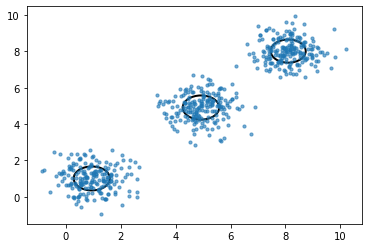

In [16]:
fig, ax = plt.subplots()
circle1 = plt.Circle((mean[0][0],mean[0][1]),np.sqrt(sigma[0]),color='black',fill=False,lw=2)
ax.add_patch(circle1)
circle2 = plt.Circle((mean[1][0],mean[1][1]),np.sqrt(sigma[1]),color='black',fill=False,lw=2)
ax.add_patch(circle2)
circle3 = plt.Circle((mean[2][0],mean[2][1]),np.sqrt(sigma[2]),color='black',fill=False,lw=2)
ax.add_patch(circle3)
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)
plt.show()
